<a href="https://colab.research.google.com/github/Lukatlina/-/blob/main/churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
churn = '/content/drive/MyDrive/practice/churn modelling/Churn_Modelling.csv'

In [ ]:
data_df = pd.read_csv(churn)

In [ ]:
data_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


* RowNumber : 행번호
* CustomerID : 고객의 아이디
* Surname : 성
* CreditScore : 신용평점
* Geography : 고객이 속한 국가
* Gender : 성별
* Age : 나이
* Tenure : 고객이 은행을 이용한 기간
* Balance : 고객의 은행 잔고
* NumOfProducts : 고객이 사용 중인 은행 상품 수
* HasCrCard : 고객이 은행의 신용 카드를 소유하고 있는지 여부
* IsActiveMember : 고객이 은행의 활성 멤버인가 여부
* EstimatedSalary : 고객의 예상 급여(달러)
* Exited : 고객이 은행 계좌를 폐쇄한 경우 이진 플래그 1, 고객이 유지된 경우 0

# EDA

In [ ]:
# Null값 없음
data_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# object로 되어 있는 컬럼들은 전처리 때 다 처리하면 될 것 같다
# int나 float로 된 다른 컬럼들의 describe값을 확인해보자
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# 기술통계량 확인
data_df.iloc[:,3:].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Surname

In [ ]:
# Surname
n = data_df['Surname'].value_counts().head(10)
n

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
Yeh         25
Shih        25
Genovese    25
Maclean     24
Wright      24
Name: Surname, dtype: int64

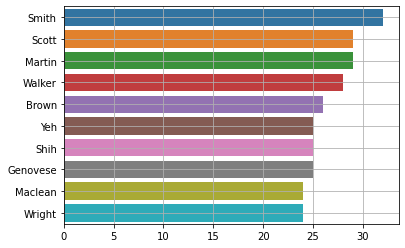

In [ ]:
sns.barplot(y = n.index, x = n.values)
plt.grid()
plt.show()

## Geography

In [ ]:
# Geography
g = data_df['Geography'].value_counts()
g

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

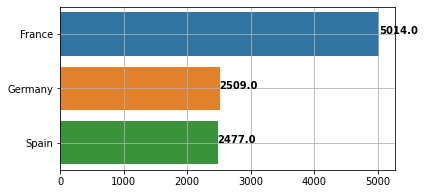

In [ ]:
bar,ax = plt.subplots(figsize=(6,3))
sns.barplot(x = g.values, y= g.index)
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_x() + rect.get_width() / 2,"%.1f"% rect.get_width(), weight='bold')
plt.grid()
plt.show()

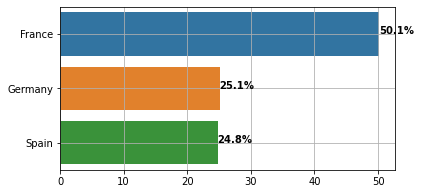

In [ ]:
bar,ax = plt.subplots(figsize=(6,3))
sns.barplot(x = g.values / np.sum(g.values) * 100, y= g.index)
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold')
plt.grid()
plt.show()

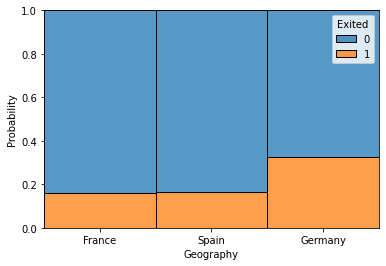

In [ ]:
sns.histplot(data_df, x='Geography', hue='Exited', stat='probability', multiple='fill')
plt.show()

* 독일 거주 고객들이 이탈한 비율이 더 높았다.

## Gender

In [ ]:
# Gender
gd = data_df['Gender'].value_counts()
gd

Male      5457
Female    4543
Name: Gender, dtype: int64

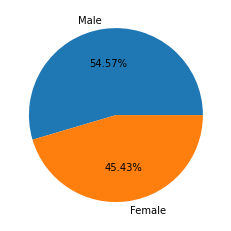

In [ ]:
plt.pie(x=gd, labels=gd.index, autopct='%.2f%%')
plt.show()

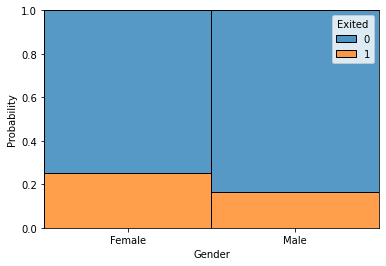

In [ ]:
sns.histplot(data_df, x='Gender', hue='Exited', stat='probability', multiple='fill')
plt.show()

## Exited

In [ ]:
# Exited
ex = data_df['Exited'].value_counts()
ex

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
def Draw_Plot_1(x, c):
    fig, ax = plt.subplots(nrows=2, figsize=(10, 6))
    sns.boxplot(x=x, data=data_df, color=c, ax=ax[0])
    sns.histplot(x=x, data=data_df, color=c, bins=20, ax=ax[1])
    plt.show()

In [ ]:
def Draw_Plot_2(x, hue):  # x별 고객수와 Exited별 고객수, 비율
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    sns.countplot(x=x, data=data_df, ax=ax[0])
    sns.countplot(x=x, hue=hue, data=data_df, ax=ax[1])
    sns.histplot(data_df, x=x, hue=hue, stat='probability', multiple='fill',ax=ax[2])

    plt.grid()
    plt.show()

## CreditScore

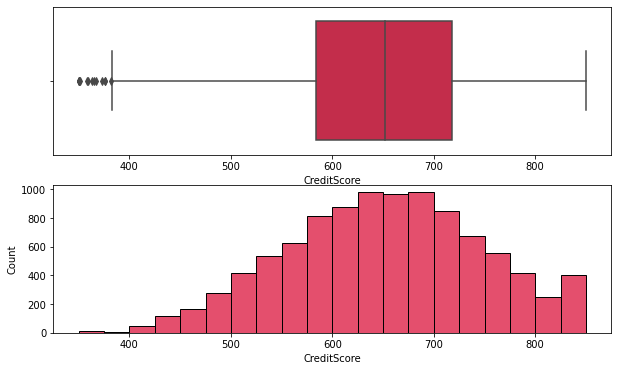

In [ ]:
# Credit Score
Draw_Plot_1('CreditScore', 'Crimson')

## Age

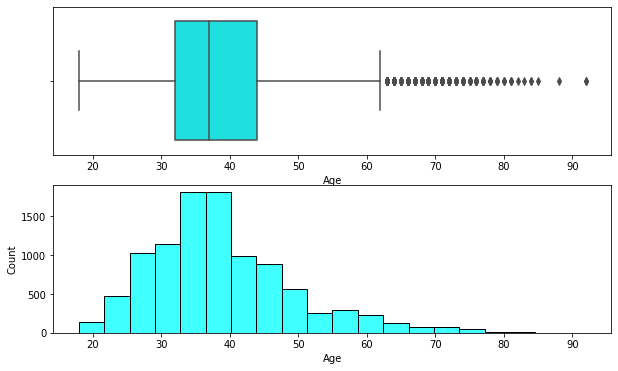

In [ ]:
# Age
Draw_Plot_1('Age', 'Cyan')

## Tenure

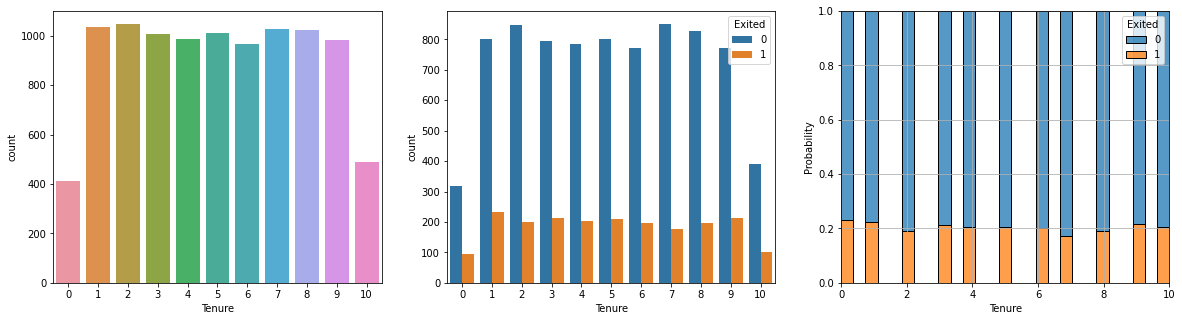

In [ ]:
# Tenure : 고객이 은행을 이용한 기간
Draw_Plot_2(x='Tenure', hue='Exited')

* 비율로 보면 생각보다 은행이용기간별로 이탈 고객 수가 차이가 나지 않는다.

## Balance

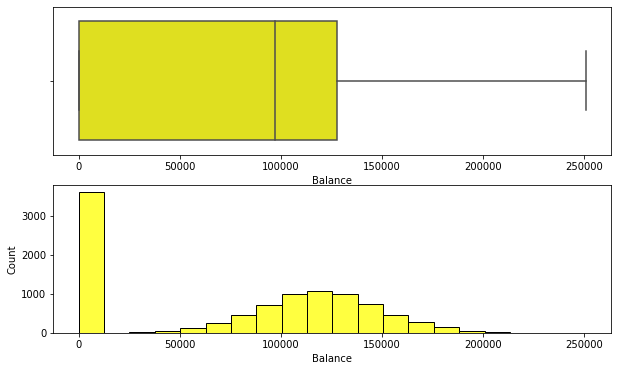

In [ ]:
# Balance : 고객의 은행 잔고
Draw_Plot_1('Balance', 'Yellow')

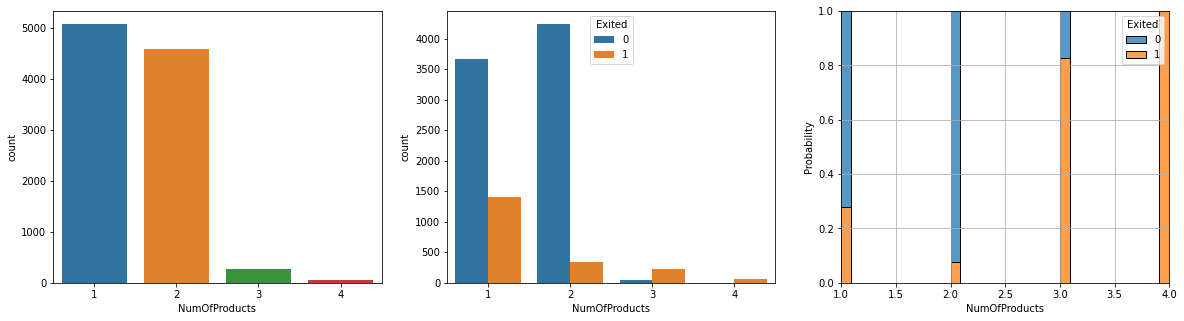

In [ ]:
# NumOfProducts : 고객이 사용 중인 은행 상품 수
Draw_Plot_2('NumOfProducts', 'Exited')

* 은행상품 수가 4개인 사람은 거의 대부분 이탈했으며 2개를 지닌 사람은 이탈 비율이 적었다.

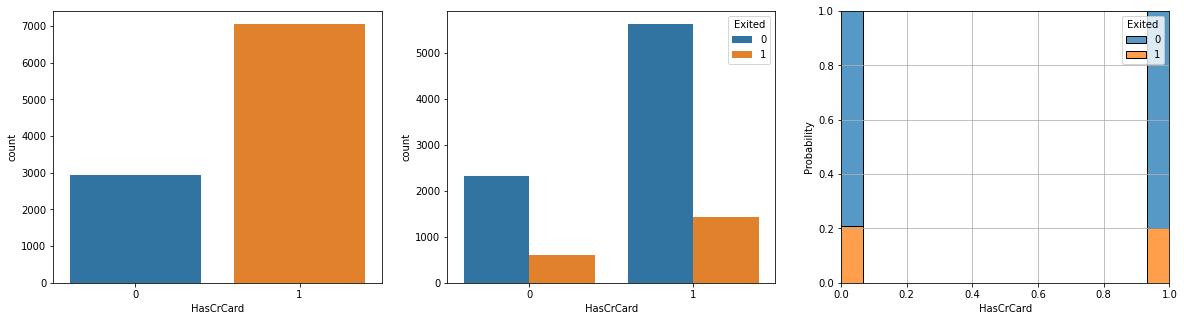

In [ ]:
# HasCrCard
Draw_Plot_2('HasCrCard', 'Exited')

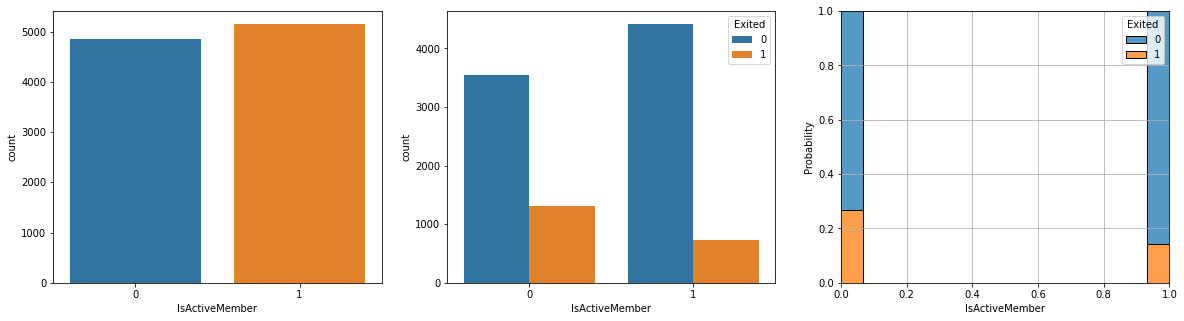

In [ ]:
# IsActiveMember
Draw_Plot_2('IsActiveMember', 'Exited')

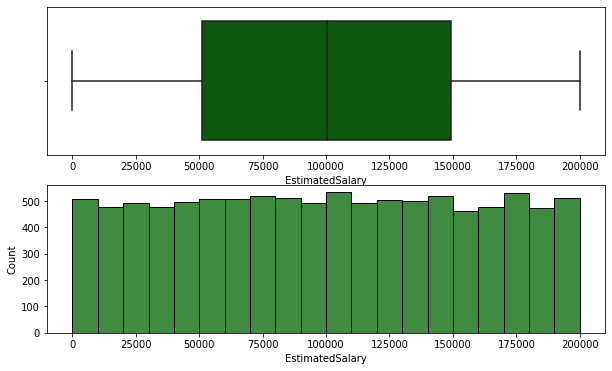

In [ ]:
# EstimatedSalary
Draw_Plot_1('EstimatedSalary', 'Darkgreen')

# 전처리

## CreditScore, Age, Balance, EstimatedSalary 구간화

In [ ]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [10, 20, 30, 40, 50, 60, 70, 80, 90]
data_df['Age'] = pd.cut(data_df['Age'], bins=bins, labels=labels)

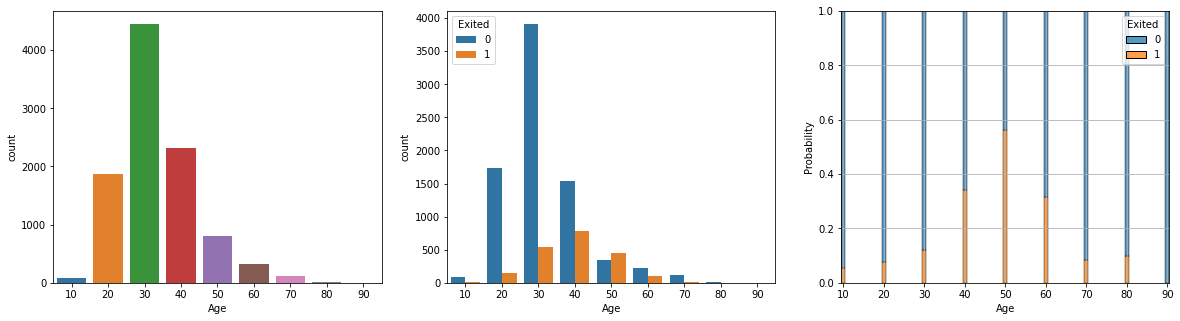

In [ ]:
Draw_Plot_2('Age', 'Exited')

* 30대 고객이 가장 많으며 50대 고객의 이탈률이 가장 높음

In [ ]:
bins = [350, 450, 550, 650, 750, 850]
labels = [1, 2, 3, 4, 5]
data_df['CreditScore'] = pd.cut(data_df['CreditScore'], bins=bins, labels=labels)

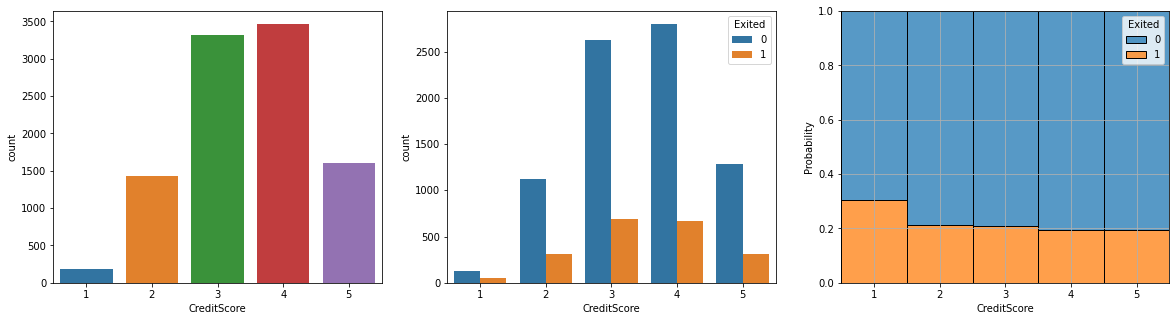

In [ ]:
Draw_Plot_2('CreditScore', 'Exited')

* 신용도가 550 ~ 750 사이인 사람들이 가장 많고 이탈자는 상대적으로 신용도가 낮은 사람들이 더 많음

In [ ]:
# Balance
data_df['Balance'] = pd.cut(data_df['Balance'], 5, labels=[1, 2, 3, 4, 5])

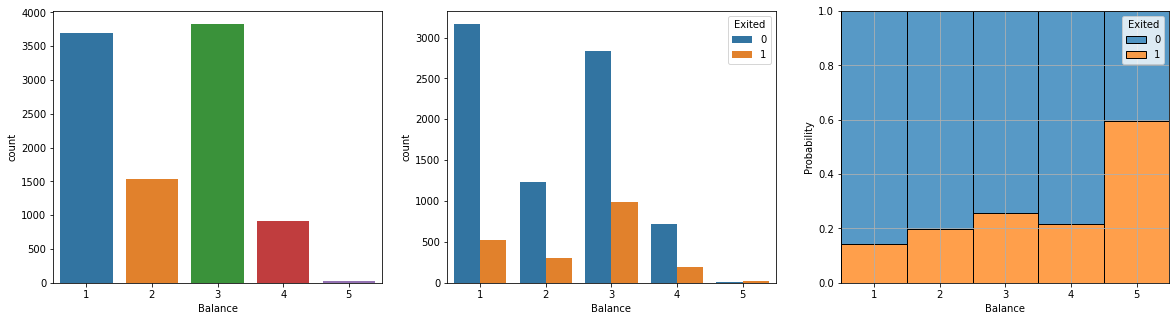

In [ ]:
Draw_Plot_2('Balance', 'Exited')

* 잔고가 거의 없거나 100,000 ~ 150,000 사이인 사람이 많으며 비율상으로는 잔고가 많은 사람들이 이탈을 더 많이 했다.

In [ ]:
# EstimatedSalary
bins = [0, 50000, 100000, 150000, 200000]
labels = [1, 2, 3, 4]
data_df['EstimatedSalary'] = pd.cut(data_df['EstimatedSalary'], bins=bins, labels=labels)

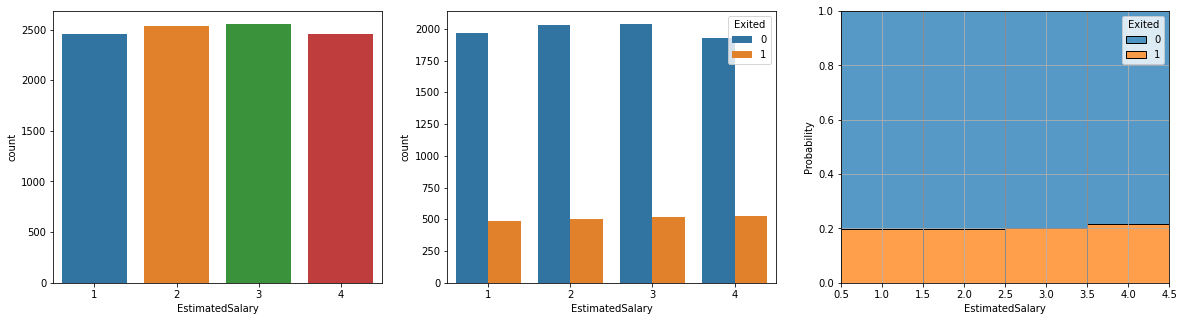

In [ ]:
Draw_Plot_2('EstimatedSalary', 'Exited')

* 추정 급여라 그런지 거의 균등하고 별 차이가 없음

In [ ]:
data_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,3,France,Female,40,2,1,1,1,1,3,1
1,2,15647311,Hill,3,Spain,Female,40,1,2,1,0,1,3,0
2,3,15619304,Onio,2,France,Female,40,8,4,3,1,0,3,1
3,4,15701354,Boni,4,France,Female,30,1,1,2,0,0,2,0
4,5,15737888,Mitchell,5,Spain,Female,40,2,3,1,1,1,2,0


In [ ]:
data_df = pd.get_dummies(data_df, columns=['Geography', 'Gender'])

In [ ]:
data_df = data_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [ ]:
data_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,3,40,2,1,1,1,1,3,1,1,0,0,1,0
1,3,40,1,2,1,0,1,3,0,0,0,1,1,0
2,2,40,8,4,3,1,0,3,1,1,0,0,1,0
3,4,30,1,1,2,0,0,2,0,1,0,0,1,0
4,5,40,2,3,1,1,1,2,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,30,5,1,2,1,0,2,0,1,0,0,0,1
9996,2,30,10,2,1,1,1,3,0,1,0,0,0,1
9997,4,30,7,1,1,0,1,1,1,1,0,0,1,0
9998,5,40,3,2,2,1,0,2,1,0,1,0,0,1


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from threading import active_count

In [ ]:
x_tr, x_te, y_tr, y_te = train_test_split(data_df.drop('Exited', axis=1),
                                          data_df['Exited'],
                                          test_size=0.2,
                                          stratify=data_df['Exited'])

In [ ]:
x_tr.shape ,x_te.shape, y_tr.shape, y_te.shape

((8000, 13), (2000, 13), (8000,), (2000,))

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=100, activation=keras.activations.elu, input_shape=(13, )))
model.add(keras.layers.Dense(units=1, activation=keras.activations.sigmoid))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.h5',
                                                save_best_only=True)
early_stop_cb = keras.callbacks.EarlyStopping(patience=3,
                                              restore_best_weights=True)

In [ ]:
history = model.fit(x_tr, y_tr, epochs=100,
                    callbacks=[checkpoint_cb, early_stop_cb],
                    validation_data=(x_te, y_te))

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.4784 - binary_accuracy: 0.7876 - val_loss: 0.4498 - val_binary_accuracy: 0.7980
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4455 - binary_accuracy: 0.8061 - val_loss: 0.4300 - val_binary_accuracy: 0.7965
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4419 - binary_accuracy: 0.8075 - val_loss: 0.4288 - val_binary_accuracy: 0.7980
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4445 - binary_accuracy: 0.8033 - val_loss: 0.4218 - val_binary_accuracy: 0.8125
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4439 - binary_accuracy: 0.8069 - val_loss: 0.4236 - val_binary_accuracy: 0.8010
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4367 - binary_accuracy: 0.8121 - val_loss: 0.4334 - val_binary_accuracy: 0.7995
Epoch 7/100
250/250 [==============================] - 1s 

In [ ]:
df = pd.DataFrame(history.history)
df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.478437,0.787625,0.449762,0.7980
1,0.445535,0.806125,0.430023,0.7965
2,0.441918,0.807500,0.428800,0.7980
3,0.444549,0.803250,0.421781,0.8125
4,0.443866,0.806875,0.423616,0.8010
5,0.436714,0.812125,0.433415,0.7995
6,0.437568,0.810125,0.439810,0.7945


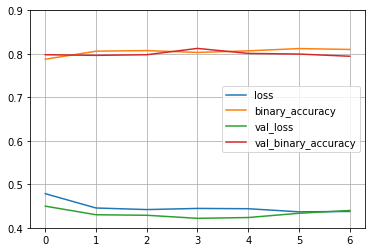

In [ ]:
df.plot()
plt.grid()
plt.yticks(np.arange(0.4, 1, 0.1))
plt.show()